In [1]:
import pandas as pd
dataset = pd.read_csv(r'C:\Users\mtsil\Desktop\english_essays.csv')
# they measure feature importance, multi-class classification, no assumptions, hangles overfitting, high variance and high correlation, non parametric, handle non-linearities in the data more effectively than linear models. This makes them better equipped for complex problems that involve multiple variables with varying degrees of importance or interaction.

In [3]:
dataset['sumscore'].median()

16.0

In [251]:
# MEHTOD 1

X = dataset['essay'].values
y = dataset['sr1_1'].values



In [252]:


# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()



In [253]:


# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

In [254]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

80.0

In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predictions )
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 score: {f1:}")

ValueError: Found input variables with inconsistent numbers of samples: [30, 25]

In [256]:
print(f'Training set accuracy: {model.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {model.score(X_test, y_test):.4f}')

Training set accuracy: 1.0000
Test set accuracy: 0.8000


In [ ]:
METHOD 2

In [257]:
dataset = pd.read_csv(r'C:\Users\mtsil\Desktop\english_essays.csv')

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['essay'], dataset['sr1_1'], 
                                                    test_size=0.2, random_state=0, 
                                                    shuffle=True)

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), 
                                   max_features = len(X_train)//2, 
                                  )

In [260]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()
print(X_train_tfidf.shape)

(80, 40)


In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train_tfidf, y_train)
preds = rf.predict(X_test_tfidf)

In [262]:
accuracy_score(y_test,preds)*100

75.0

In [200]:
# METHOD 3

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L12-v2')
X_train_embedding = np.stack(X_train.apply(lambda row: np.array(model.encode(row))).values)
X_test_embedding = np.stack(X_test.apply(lambda row: np.array(model.encode(row))).values)
print(X_train_embedding.shape)

c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
modules.json: 100%|████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 198kB/s]
c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mtsil\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs

(80, 384)


In [201]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_embedding, y_train)
preds = rf2.predict(X_test_embedding)

In [202]:
accuracy_score(y_test,preds)*100

50.0

In [230]:
# METHOD 4

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(dataset["essay"], 
      dataset["sr1_4"],  random_state = 42)

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(dataset["essay"], 
      dataset["sr1_4"],  random_state = 42)
# Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample
# each bagged tree makes use of around 2/3 (two-thirds) of population data. The remaining 1/3 (one-third) population data not used to fit a given bagged tree are referred to as the out-of-bag (OOB) observations.

In [ ]:
 In the sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out-of-bag samples.

In [232]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [233]:
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [235]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

56.00000000000001

In [236]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

56.00000000000001

In [237]:
print(f'Training set accuracy: {model.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {model.score(X_test, y_test):.4f}')

Training set accuracy: 1.0000
Test set accuracy: 0.5600


In [238]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.59      0.87      0.70        15
           3       0.33      0.12      0.18         8

    accuracy                           0.56        25
   macro avg       0.31      0.33      0.29        25
weighted avg       0.46      0.56      0.48        25



c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [82]:
f1_score(y_test, predictions, average='micro')

0.45

In [84]:
matr=confusion_matrix(y_test,predictions)
matr

array([[1, 2, 0],
       [1, 6, 1],
       [1, 6, 2]], dtype=int64)

<Axes: >

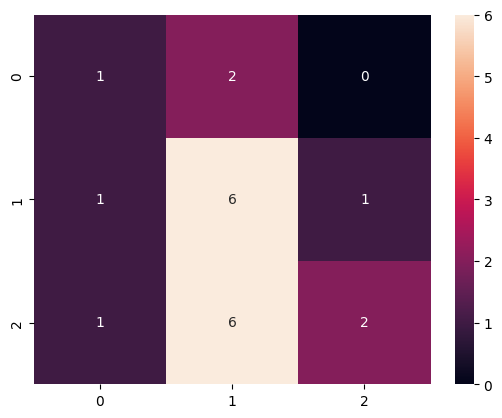

In [86]:
import seaborn as sn
sn.heatmap(matr,annot=True,fmt='.2g')

In [239]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [240]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [243]:
rfc = RandomForestClassifier()

In [244]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_search_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 51),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 101)})

In [135]:
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params)

In [246]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [247]:
y_pred = rfc.predict(X_test)

In [248]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48


In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(80, 977)
(80, 977)


In [37]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(20, 977)
(20, 977)


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

60.0

In [39]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[ 0,  2,  0],
       [ 0, 12,  0],
       [ 0,  6,  0]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

60.0

In [21]:
df = dataset[['essay', 'sr1_4']]


<Axes: ylabel='sumscore'>

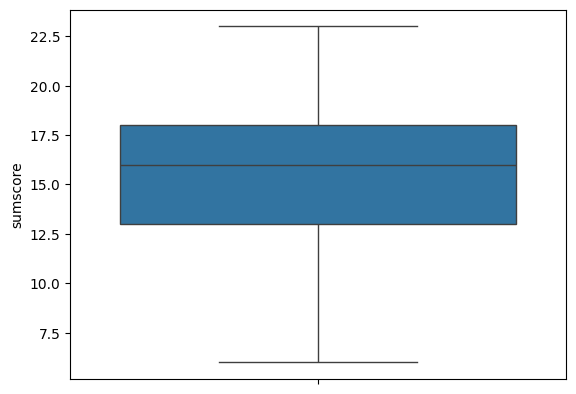

In [3]:
import seaborn as sns

sns.boxplot(dataset['sumscore'])

In [51]:
from scipy.stats import binned_statistic
import numpy as np
x_data = np.arange(0, len(dataset))
y_data = dataset['sumscore']
x_bins, bin_edges, misc = binned_statistic(y_data, x_data, 
                                           statistic='median', bins=6)

In [47]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])
bin_intervals

IntervalIndex([(6.0, 8.833333333333334], (8.833333333333334, 11.666666666666668], (11.666666666666668, 14.5], (14.5, 17.333333333333336], (17.333333333333336, 20.166666666666668], (20.166666666666668, 23.0]], dtype='interval[float64, right]')

In [52]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [55]:
dataset['sampled_cupcake'] = dataset['sumscore'].apply(lambda x: 
                                            set_to_median(x, bin_intervals))

In [56]:
dataset['sampled_cupcake']

0     15.916667
1     15.916667
2     18.750000
3     15.916667
4     13.083333
        ...    
95    10.250000
96    13.083333
97    18.750000
98    15.916667
99    15.916667
Name: sampled_cupcake, Length: 100, dtype: float64

In [35]:
#Bin continuous data into discrete intervals
dataset["sumscore"].value_counts(bins=3, sort=False)

sumscore
(5.981999999999999, 11.667]    10
(11.667, 17.333]               62
(17.333, 23.0]                 28
Name: count, dtype: int64

In [14]:
df = dataset['sr1_3']
df.value_counts()

sr1_3
2    66
1    17
3    14
0     3
Name: count, dtype: int64

In [19]:
import numpy as np
df['sr1_3'] = np.where( df.sr1_3 > 1000, 1, 0)

AttributeError: 'Series' object has no attribute 'sr1_3'

In [16]:
labels = dataset['sr1_3'].map(lambda x : 1 if int(x) > 30 else 0)
labels

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: sr1_3, Length: 100, dtype: int64

In [ ]:
data = dataset[['essay', 'sr1_4']]


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['essay'],df['sr1_4'], test_size = 0.20, random_state = 42)

In [ ]:
pip install tensorflow-text

In [3]:
data.replace([4, 3, 2, 1], [3, 2, 1, 0], inplace = True)

C:\Users\mtsil\AppData\Local\Temp\ipykernel_19728\1750568804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([4, 3, 2, 1], [3, 2, 1, 0], inplace = True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import EarlyStoppingCallback

In [29]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=4)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
X = list(data["essay"])
y = list(data["sr1_4"])

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [32]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [33]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [34]:
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [11]:
pip install accelerate -U

Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch

In [35]:
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    seed=0,
    load_best_model_at_end=True,
)

In [36]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

In [ ]:
trainer.train()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [15]:
dataset['sumscore'].value_counts()

sumscore
13    16
16    15
14    10
15     8
18     8
20     8
17     8
19     7
12     5
11     4
10     3
6      2
23     2
21     2
22     1
8      1
Name: count, dtype: int64

In [16]:
df = dataset[['essay', 'sumscore']].copy()
df['essay'][80]

"How to get enough energy You should have enough energy, if not you are not ready for your life. To have enough energy, you must eat good food and don't eat to late, because if you're eating to late you can't sleep! Don't eat some heavy food at the evening, because it gives you to much and then you can't sleep. If you want a good sleeptime, at 8 pm go to sleep and at 6 o'clock you can stand up early, because you have 10 hours sleep and this is enough. If you think you have to much school and no freetime, maybe is that like this, because you're doing to much stuff, ehich you don't like in your freetime. So, in your freetime you should go out or go to do sport or make your hobbys. If you had doing all this things, then go to school, because right now, you can better learn something."

In [17]:
from num2words import num2words

# convert numbers to words

def clean_text(text):
    text = " ".join([num2words(word) if word.isdigit() else word for word in text.split()])
    return text

df['essay']= df["essay"].apply(clean_text)
pd.set_option('display.max_colwidth', None)
df['essay'][80]

"How to get enough energy You should have enough energy, if not you are not ready for your life. To have enough energy, you must eat good food and don't eat to late, because if you're eating to late you can't sleep! Don't eat some heavy food at the evening, because it gives you to much and then you can't sleep. If you want a good sleeptime, at eight pm go to sleep and at six o'clock you can stand up early, because you have ten hours sleep and this is enough. If you think you have to much school and no freetime, maybe is that like this, because you're doing to much stuff, ehich you don't like in your freetime. So, in your freetime you should go out or go to do sport or make your hobbys. If you had doing all this things, then go to school, because right now, you can better learn something."

In [18]:
# remove those digits which could not be converted into words

def clean(text):
    text= ''.join(c for c in text if not c.isdigit())
    
   
    return text



df['essay']= df["essay"].apply(clean)
pd.set_option('display.max_colwidth', None)
df['essay'][80]

"How to get enough energy You should have enough energy, if not you are not ready for your life. To have enough energy, you must eat good food and don't eat to late, because if you're eating to late you can't sleep! Don't eat some heavy food at the evening, because it gives you to much and then you can't sleep. If you want a good sleeptime, at eight pm go to sleep and at six o'clock you can stand up early, because you have ten hours sleep and this is enough. If you think you have to much school and no freetime, maybe is that like this, because you're doing to much stuff, ehich you don't like in your freetime. So, in your freetime you should go out or go to do sport or make your hobbys. If you had doing all this things, then go to school, because right now, you can better learn something."

In [19]:
import contractions

# expand contractions

df['essay']= df['essay'].apply(lambda x: contractions.fix(x))
df['essay'][80]

'How to get enough energy You should have enough energy, if not you are not ready for your life. To have enough energy, you must eat good food and do not eat to late, because if you are eating to late you cannot sleep! Do not eat some heavy food at the evening, because it gives you to much and then you cannot sleep. If you want a good sleeptime, at eight pm go to sleep and at six of the clock you can stand up early, because you have ten hours sleep and this is enough. If you think you have to much school and no freetime, maybe is that like this, because you are doing to much stuff, ehich you do not like in your freetime. So, in your freetime you should go out or go to do sport or make your hobbys. If you had doing all this things, then go to school, because right now, you can better learn something.'

In [20]:
# convert to lower cases

df['essay'] = df['essay'].str.lower()
df['essay'][80]

'how to get enough energy you should have enough energy, if not you are not ready for your life. to have enough energy, you must eat good food and do not eat to late, because if you are eating to late you cannot sleep! do not eat some heavy food at the evening, because it gives you to much and then you cannot sleep. if you want a good sleeptime, at eight pm go to sleep and at six of the clock you can stand up early, because you have ten hours sleep and this is enough. if you think you have to much school and no freetime, maybe is that like this, because you are doing to much stuff, ehich you do not like in your freetime. so, in your freetime you should go out or go to do sport or make your hobbys. if you had doing all this things, then go to school, because right now, you can better learn something.'

In [21]:

# remove punctuation marks apart from full stop
# remove special characters
# remove whitespaces

import re


def clean(text):
    
    text = re.sub(r'[^a-zA-Z0-9\s\.]', '', text) 
   
    text = " ".join(text.split())
    
    
    return text



df['essay']= df["essay"].apply(clean)
pd.set_option('display.max_colwidth', None)
df['essay'][80]

'how to get enough energy you should have enough energy if not you are not ready for your life. to have enough energy you must eat good food and do not eat to late because if you are eating to late you cannot sleep do not eat some heavy food at the evening because it gives you to much and then you cannot sleep. if you want a good sleeptime at eight pm go to sleep and at six of the clock you can stand up early because you have ten hours sleep and this is enough. if you think you have to much school and no freetime maybe is that like this because you are doing to much stuff ehich you do not like in your freetime. so in your freetime you should go out or go to do sport or make your hobbys. if you had doing all this things then go to school because right now you can better learn something.'

In [22]:
# remove a list of specific words

remove_words = ['hundred', 'thousand', 'h','wichtig', 'vor', 'oder', 'notiz', 'gesundheit', 'z.b.', 'bevor', 'trotzdem',
'sportler', 'habe', 'wenn', 'trinke', 'ungesund',  'gesund', 'obst', 'bewegen', 'ca', 'musst']


df['essay'] = df['essay'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove_words)]))
df['essay'][80]

'how to get enough energy you should have enough energy if not you are not ready for your life. to have enough energy you must eat good food and do not eat to late because if you are eating to late you cannot sleep do not eat some heavy food at the evening because it gives you to much and then you cannot sleep. if you want a good sleeptime at eight pm go to sleep and at six of the clock you can stand up early because you have ten hours sleep and this is enough. if you think you have to much school and no freetime maybe is that like this because you are doing to much stuff ehich you do not like in your freetime. so in your freetime you should go out or go to do sport or make your hobbys. if you had doing all this things then go to school because right now you can better learn something.'

In [23]:
df['essay'] = df['essay'].str.replace('how to boost your energy', '')
df['essay'][80]

'how to get enough energy you should have enough energy if not you are not ready for your life. to have enough energy you must eat good food and do not eat to late because if you are eating to late you cannot sleep do not eat some heavy food at the evening because it gives you to much and then you cannot sleep. if you want a good sleeptime at eight pm go to sleep and at six of the clock you can stand up early because you have ten hours sleep and this is enough. if you think you have to much school and no freetime maybe is that like this because you are doing to much stuff ehich you do not like in your freetime. so in your freetime you should go out or go to do sport or make your hobbys. if you had doing all this things then go to school because right now you can better learn something.'